# Diagram klasowy UML - Przewodnik po symbolach

Przegląd notacji UML dla diagramów klasowych.

## 1. Typy klas

### 1.1 Konkretna klasa (*ang. Concrete Class*)

**Diagram:**

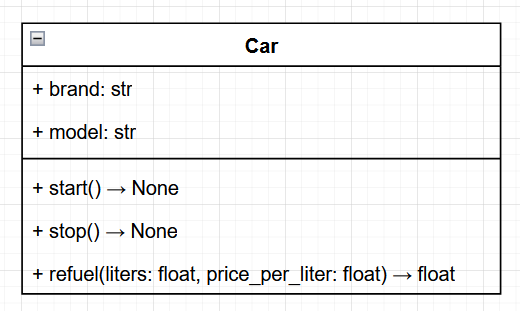

In [5]:
class Car:
    def __init__(self, brand, model):
        self.brand = brand  # Atrybut
        self.model = model
    
    def start(self):  # Metoda
        print(f"{self.brand} started")
    
    def stop(self):
        print(f"{self.brand} stopped")

    def refuel(self, liters: float, price_per_liter: float) -> float:
        cost = liters * price_per_liter
        self.fuel_level = min(100, self.fuel_level + liters)
        return cost

### 1.2 Klasa abstrakcyjna (*ang. Abstract Class*)

**Diagram:**

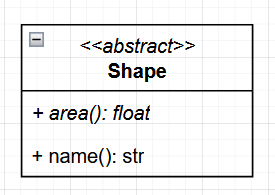

**Notacja:**
- Nazwa klasy: `<<abstract>>` i/lub *kursywa*
- Metody abstrakcyjne: *kursywa*

In [6]:
from abc import ABC, abstractmethod

class Shape(ABC):  # Klasa abstrakcyjna
    @abstractmethod
    def area(self):  # Metoda abstrakcyjna
        pass
        
    def name(self):
        return "shape"


### 1.3 Interfejs (*ang. Interface*)

**Diagram:**

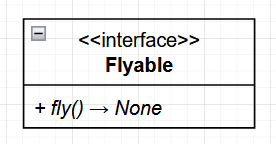

**Notacja:**
- Nazwa klasy: `<<interface>>`
- Wszystkie metody abstrakcyjne: *kursywa*

In [8]:
from abc import ABC, abstractmethod

class Flyable(ABC):  # Interfejs (w Pythonie jako ABC)
    @abstractmethod
    def fly(self):
        pass


## 2. Elementy klasy - atrybuty i metody

### 2.1 Widoczność (*ang. Visibility*)

**Symbole:**
- `+` **publiczny (ang. public)** - dostępny wszędzie
- `#` **chroniony (ang. protected)** - dostępny w klasie i podklasach
- `-` **prywatny (ang. private)** - dostępny tylko w klasie

**Diagram:**

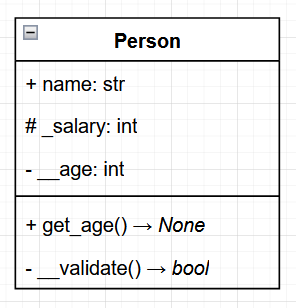

**Python konwencje:**
- `name` - public
- `_name` - protected (konwencja, nie wymuszane)
- `__name` - private (name mangling: `_ClassName__name`)

In [16]:
class Person:
    def __init__(self, name: str, age: int, salary: int):
        self.name = name           # + public
        self._salary = salary      # # protected (convention)
        self.__age = age           # - private (name mangling)
    
    def get_age(self):             # + public
        return self.__age
    
    def __validate(self):          # - private
        return self.__age > 0


# Usage
person = Person("Alice", 30, 20000)

print(person.name)       # OK - public
print(person.get_age())  # OK - public method
print(person._salary)  # OK - protected (convention)
# print(person.__age)    # Error - private
print(person._Person__age)  # OK - Name mangling
# print(person.__validate())  # Error - private
print(person._Person__validate())  # OK - Name mangling

Alice
30
20000
30
True


### 2.2 Typy atrybutów

**Diagram:**

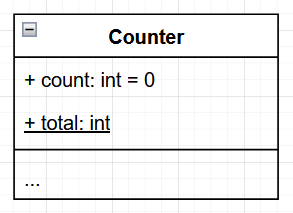

**Notacja:**
- Atrybut obiektowy: `- name: type`
- Atrybut klasowy: <u>podkreślenie</u>
- Wartość domyślna: `- name: type = value`

In [ ]:
class Counter:
    total = 0  # Atrybut klasowy (statyczny)
    
    def __init__(self):
        self.count = 0  # Atrybut obiektowy
        Counter.total += 1
    
    def increment(self):
        self.count += 1


# Użycie
c1 = Counter()
c2 = Counter()
print(Counter.total)  # 2 (atrybut klasy)
print(c1.count)       # 0 (atrybut instancji)

### 2.3 Typy metod

**Diagram:**

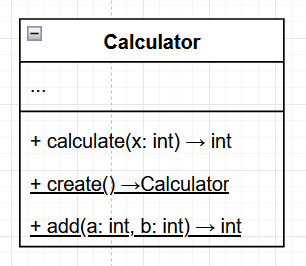

**Typy metod:**
1. **Metoda instancji** - normalny, wymaga `self`
2. **Metoda klasowa** - <u>podkreślenie</u>, wymaga `cls`
3. **Metoda statyczna** - <u>podkreślenie</u>, bez `self`/`cls`
4. **Metoda abstrakcyjna** - *kursywa*

In [ ]:
class Calculator:
    def __init__(self, value):
        self.value = value
    
    # Metoda obiektowa (instancji)
    def calculate(self, x):
        return self.value + x
    
    # Metoda klasowa
    @classmethod
    def create(cls):
        return cls(0)
    
    # Metoda statyczna
    @staticmethod
    def add(a, b):
        return a + b


# Użycie
calc = Calculator(10)
print(calc.calculate(5))        # 15 (metoda instancji)
calc2 = Calculator.create()     # Metoda klasowa
print(Calculator.add(3, 4))     # 7 (metoda statyczna)

**Kiedy używać:**
- **Metoda instancji** - domyślnie, operacje na obiekcie
- **Metoda klasowa** - fabryki, tworzenie obiektów
- **Metoda statyczna** - funkcje pomocnicze bez dostępu do klasy/instancji

## 3. Relacje między klasami

Relacje są przedstawione w kolejności od najsłabszej do najmocniejszej.

### 3.1 Zależność (*ang. Dependency*)

**Typ relacji:** USE-A  
**Znaczenie:** Najsłabsza relacja. Klasa **używa** innej klasy tymczasowo (parametr, zmienna lokalna).  
**Symbol:** Przerywana linia `⋯⋯⋯⋯` (ze strzałką na końcu lub bez)  

**Diagram:**

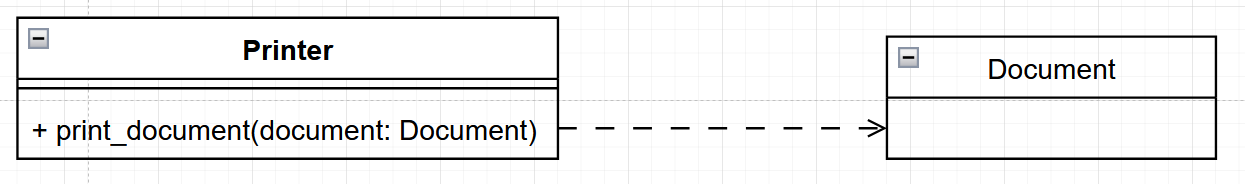

**Kluczowe cechy zależności:**
- Linia **przerywana**
- Zwykła strzałka (nie trójkąt)
- Najsłabsza relacja
- Obiekt używany jako parametr lub zmienna lokalna
- **NIE** jest polem klasy

In [ ]:
class Document:
    def __init__(self, content):
        self.content = content


class Printer:
    # Zależność - Document jest TYLKO parametrem metody
    def print_document(self, document: Document):
        print(f"Drukowanie: {document.content}")


# Użycie
doc = Document("Hello")
printer = Printer()
printer.print_document(doc)  # Tymczasowe użycie

### 3.2 Asocjacja (*ang. Association*)

**Typ realcji"": weak HAS-A  
**Znaczenie:** Jedna klasa **ma** drugą. Słaba relacja, obiekty mogą istnieć niezależnie.  
**Symbol:** Prosta linia `────────` (ze strzałką na końcu lub bez)

**Diagram:**

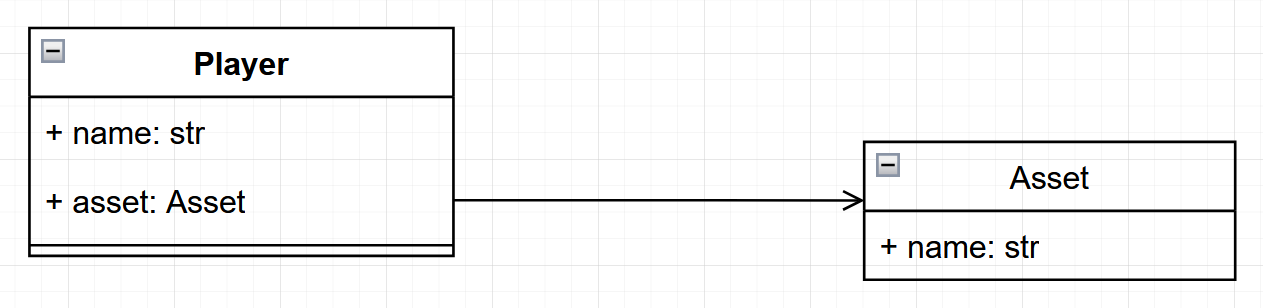

In [ ]:
class Asset:
    def __init__(self, name):
        self.name = name


class Player:
    def __init__(self, name: str, asset: Asset):
        self.name = name
        self.asset = asset  # Asocjacja - klasa dostaje gotowy obiekt, nie odpowiada za jego tworzenie


# Użycie
asset = Asset("xyz")
player = Player("Alice")
player.buy(asset)

**Kluczowe cechy asocjacji:**

- Obiekty istnieją **niezależnie**
- Mogą być tworzone i niszczone oddzielnie
- Relacja może być dwukierunkowa lub jednokierunkowa
- Typy asocjacji: jedne-do-jeden, jedne-do-wielu, wiele-do-wielu

### 3.3 Agregacja (*ang. Aggregation*)

**Typ relacji**: weak HAS-A  
**Symbol:** Pusty diament na końcu `◇────────` (ze strzałką na drugim końcu lub bez)   
**Znaczenie:** Relacja **"ma"**, ale słaba. Część może istnieć bez całości.

**Diagram:**

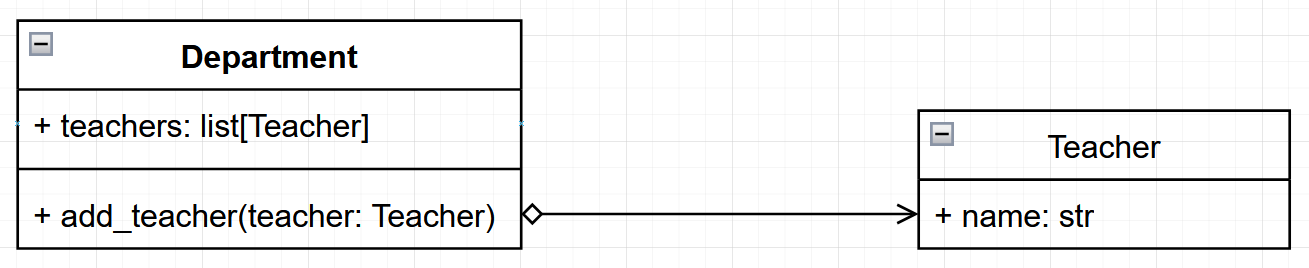

Diament jest po stronie **całości** (Department).

In [17]:
class Teacher:
    def __init__(self, name):
        self.name = name


class Department:
    def __init__(self, name):
        self.name = name
        self.teachers = []  # Agregacja - Department "ma" Teachers (jeden department, wielu nauczycieli)
    
    def add_teacher(self, teacher):
        self.teachers.append(teacher)


# Użycie
teacher = Teacher("Bob")      # Teacher istnieje niezależnie
dept = Department("CS")
dept.add_teacher(teacher)

# Usunięcie departamentu NIE usuwa nauczycieli
del dept
print(teacher.name)  # Bob nadal istnieje

Bob


**Kluczowe cechy agregacji:**

- Relacja często okreslana jako redundantna względem asocjacji
- Podtyp asocjacji. Asocjacja typu: jeden-do-wielu lub wiele-do-wielu
- "Całość" zawiera "części"
- Części mogą istnieć **niezależnie** od całości
- Cykl życia części ≠ cykl życia całości

### 3.4 Kompozycja (*ang. Composition*)

**Typ relacji**: strong HAS-A  
**Symbol:** Pełny diament na końcu `◆────────` (ze strzałką na drugim końcu lub bez)   
**Znaczenie:** Silna relacja **"ma" (has-a)**. Część NIE może istnieć bez całości.

**Diagram:**

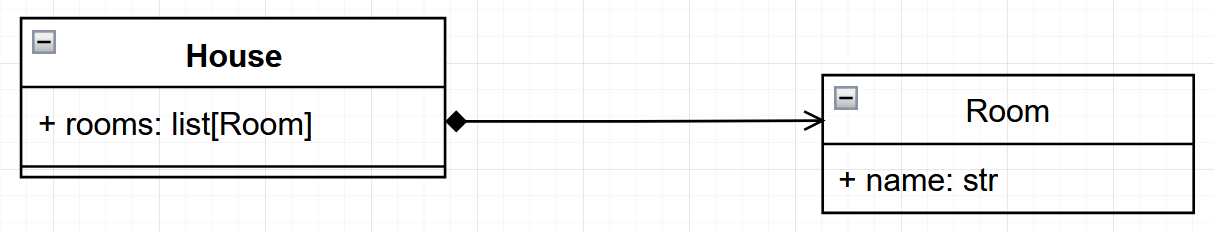

Diament jest po stronie **całości** (House).

In [18]:
class Room:
    def __init__(self, name):
        self.name = name


class House:
    def __init__(self):
        # Kompozycja - House tworzy Rooms
        # Rooms nie istnieją bez House
        self.rooms = [
            Room("Kitchen"),
            Room("Bedroom"),
            Room("Bathroom")
        ]


# Użycie
house = House()

# Usunięcie domu usuwa pokoje
del house  # Rooms są automatycznie usuwane (garbage collected)

**Kluczowe cechy kompozycji:**
- Część **nie może istnieć** bez całości
- Całość odpowiada za tworzenie części
- Cykl życia części = cykl życia całości
- Pokój nie istnieje bez domu

### Zestawienie relacji typu HAS-A (Asocjacja vs Agregacja vs Kompozycja)

| Relacja | Symbol | Siła | Cykl życia | Znaczenie | Przykład |
|---------|--------|------|------------|----------|-----------|
| **Asocjacja** | `─────>` | Słaba | Niezależne | "ma, ale część może istnieć bez" | Player ma Asset |
| **Agregacja** | `◇────>` | Słaba | Niezależne | "ma wiele, ale części mogą istnieć bez całości" | Department ma Teachers |
| **Kompozycja** | `◆────>` | Średnia | Zależne | "ma i część nie może istnieć bez" | House ma Rooms |

### 3.5 Realizacja / Implementacja (*ang. Realization*)

**Type relacji**: IMPLEMENT-A  
**Symbol:** Pusta strzałka z trójkątem `◁⋯⋯⋯` (linia przerywana)  
**Znaczenie:** Klasa **implementuje** interfejs.

**Diagram:**

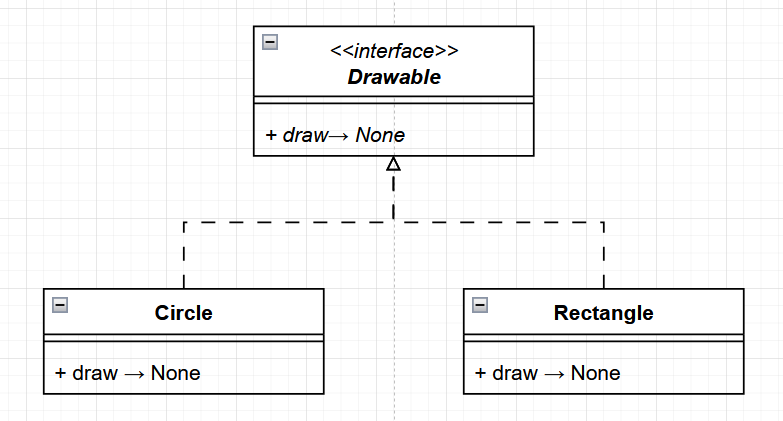

Strzałka wskazuje na **interfejs** (Drawable).

In [ ]:
from abc import ABC, abstractmethod

class Drawable(ABC):  # Interfejs
    @abstractmethod
    def draw(self):
        pass


class Circle(Drawable):  # Implementuje Drawable
    def draw(self):
        print("Rysowanie koła")


class Rectangle(Drawable):  # Implementuje Drawable
    def draw(self):
        print("Rysowanie prostokąta")


# Użycie
shapes = [Circle(), Rectangle()]
for shape in shapes:
    shape.draw()

**Kluczowe cechy implementacji:**
- Linia **przerywana** (słabsza niż dziedziczenie)
- Strzałka **pusta** z trójkątem
- Klasa musi zaimplementować wszystkie metody interfejsu

### 3.6 Dziedziczenie / Generalizacja (*ang. Inheritance*)

**Typ relacji**: IS-A  
**Znaczenie:** Najsilniejsza relacja. Relacja **"jest"**. Podklasa dziedziczy po nadklasie.  
**Symbol:** Pusta strzałka z trójkątem `◁─────` (linia ciągła)  

**Diagram:**

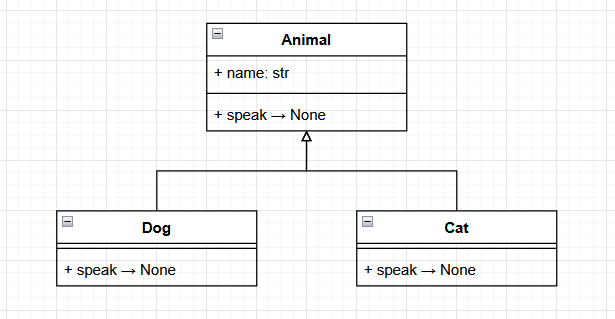

Strzałka wskazuje na **nadklasę** (Animal).

In [19]:
class Animal:
    def __init__(self, name):
        self.name = name
    
    def speak(self):
        pass


class Dog(Animal):  # Dog "jest" Animal
    def speak(self):
        return "Woof!"


class Cat(Animal):  # Cat "jest" Animal
    def speak(self):
        return "Meow!"


# Użycie
dog = Dog("Rex")
print(dog.speak())  # Woof!

Woof!


**Kluczowe cechy dziedziczenia:**
- Linia **ciągła** (silna relacja)
- Strzałka **pusta** z trójkątem
- Podklasa dziedziczy atrybuty i metody
- Relacja **"jest" (is-a)**

### 3.7 Podsumowanie relacji

| Relacja | Symbol | Linia | Końcówka | Znaczenie | Przykład |
|---------|--------|-------|----------|-----------|----------|
| **Zależność** | `⋯⋯⋯⋯>` | Przerywana | Strzałka | Używa tymczasowo | Printer ⋯> Document |
| **Asocjacja** | `─────>` | Ciągła | Strzałka | Używa | Player → Asset |
| **Agregacja** | `◇────>` | Ciągła | Pusty diament | Ma (słabe) | Department ◇→ Teacher |
| **Kompozycja** | `◆────>` | Ciągła | Pełny diament | Ma (silne) | House ◆→ Room |
| **Implementacja** | `◁⋯⋯⋯` | Przerywana | Pusty trójkąt | Implementuje | Circle ⋯△ Drawable |
| **Dziedziczenie** | `◁─────` | Ciągła | Pusty trójkąt | Jest | Dog ──△ Animal |

**Mnemonic:**
- **Ciągła linia** = silniejsza relacja (asocjacja, agregacja, kompozycja, dziedziczenie)
- **Przerywana linia** = słabsza relacja (zależność, implementacja)
- **Trójkąt** = hierarchia (dziedziczenie, implementacja)
- **Diament** = zawieranie (agregacja, kompozycja)
- **Pełny symbol** = silniejsza wersja (kompozycja > agregacja)

## 4. Krotność (Cardinality)

**Symbol:** Liczby/zakresy na końcach relacji

**Notacja:**
- `1` - dokładnie jeden
- `0..1` - zero lub jeden
- `*` lub `0..*` - zero lub więcej
- `1..*` - jeden lub więcej
- `n..m` - od n do m

**Diagram:**

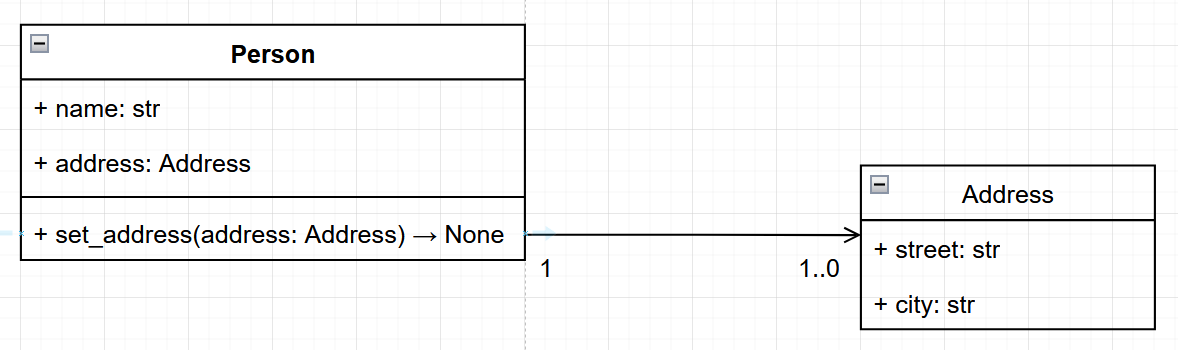

In [26]:
# Przykład: Person 1 --- 0..1 Address
class Address:
    def __init__(self, street:str, city: str):
        self.street = street
        self.city = city


class Person:
    def __init__(self, name: str):
        self.name = name
        self.address = None  # 0..1 (może być None)
    
    def set_address(self, address: str):
        self.address = address

**Diagram:**

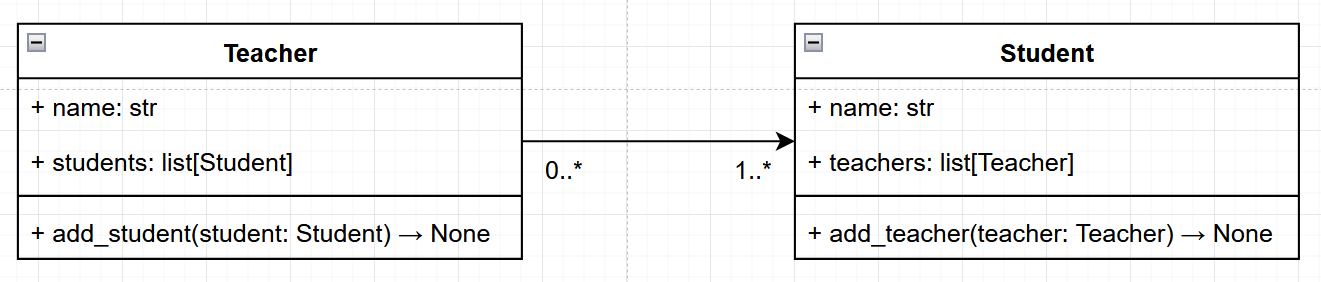

In [25]:
# Przykład: Teacher 0..* ---- 1..* Student
class Teacher:
    def __init__(self, name: str, student: "Student"):
        self.name = name
        self.students = [student]  # 1..* (lista, minimum 1)

    def add_student(self, student: "Student"):
        self.students.append(student)


class Student:
    def __init__(self, name):
        self.name = name
        self.teachers = []  # 0..*

    def add_teacher(self, teacher: Teacher):
        self.teachers.append(teacher)

## 5. Cheat Sheet

### Relacje

| Symbol | Nazwa | Linia | Końcówka | Opis |
|--------|-------|-------|----------|------|
| `⋯⋯>` | Zależność | Przerywana | Strzałka | A zależy od B |
| `────>` | Asocjacja | Ciągła | Strzałka | A używa B |
| `◇───>` | Agregacja | Ciągła | Pusty diament | A ma B (słabe) |
| `◆───>` | Kompozycja | Ciągła | Pełny diament | A ma B (silne) |
| `⋯⋯△` | Implementacja | Przerywana | Pusty trójkąt | B implementuje A |
| `──△` | Dziedziczenie | Ciągła | Pusty trójkąt | B dziedziczy po A |

### Widoczność

| Symbol | Nazwa | Opis |
|--------|-------|------|
| `+` | public | Dostępny wszędzie |
| `-` | private | Tylko w klasie |
| `#` | protected | W klasie i podklasach |
| `~` | package | W pakiecie |

### Typy klas

| Typ | Notacja | Opis |
|-----|---------|------|
| Klasa zwykła | `ClassName` | Normalna klasa |
| Klasa abstrakcyjna | `<<abstract>>` lub *ClassName* | Nie można utworzyć instancji |
| Interfejs | `<<interface>>` | Tylko metody abstrakcyjne |

### Typy metod

| Typ | Notacja | Python |
|-----|---------|--------|
| Instancji | `+ method(): type` | `def method(self)` |
| Klasowa | `+ method(): type {classmethod}` | `@classmethod` |
| Statyczna | `+ method(): type {static}` | `@staticmethod` |
| Abstrakcyjna | *+ method(): type* | `@abstractmethod` |

### Krotność

| Notacja | Znaczenie |
|---------|----------|
| `1` | Dokładnie jeden |
| `0..1` | Zero lub jeden |
| `*` lub `0..*` | Zero lub więcej |
| `1..*` | Jeden lub więcej |
| `n..m` | Od n do m |

## 7. Ćwiczenie - diagram z kodu

**Zadanie:** Narysuj diagram UML dla poniższego kodu:

In [ ]:
from abc import ABC, abstractmethod

class Payment(ABC):
    @abstractmethod
    def process(self):
        pass

class CreditCard(Payment):
    def __init__(self, number):
        self.number = number
    
    def process(self):
        print(f"Processing credit card {self.number}")

class Order:
    def __init__(self):
        self.items = []  # Kompozycja
    
    def add_item(self, item):
        self.items.append(item)
    
    def checkout(self, payment: Payment):  # Zależność
        payment.process()

class Item:
    def __init__(self, name, price):
        self.name = name
        self.price = price